In [ ]:
!wget -O data.csv  https://drive.usercontent.google.com/u/0/uc?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y&export=download


--2024-06-24 10:12:02--  https://drive.usercontent.google.com/u/0/uc?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.23.132, 2404:6800:4008:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.23.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.usercontent.google.com/uc?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y [following]
--2024-06-24 10:12:03--  https://drive.usercontent.google.com/uc?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y [following]
--2024-06-24 10:12:03--  https://drive.usercontent.google.com/download?id=1tJaiv0aXMr2Lri8xKNLXzf3L6t6uCJ2Y
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


In [ ]:
data = pd.read_csv('data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


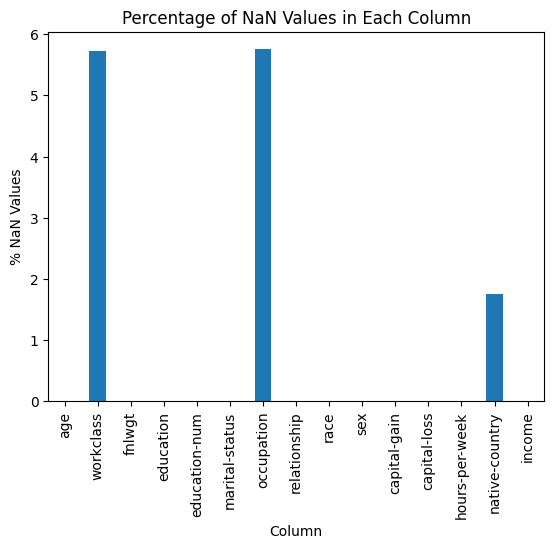

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64

In [ ]:
nan_percentages = data.isnull().sum() / len(data) * 100
nan_percentages.plot(kind='bar')
plt.xlabel('Column')
plt.ylabel('% NaN Values')
plt.title('Percentage of NaN Values in Each Column')
plt.show()
nan_percentages

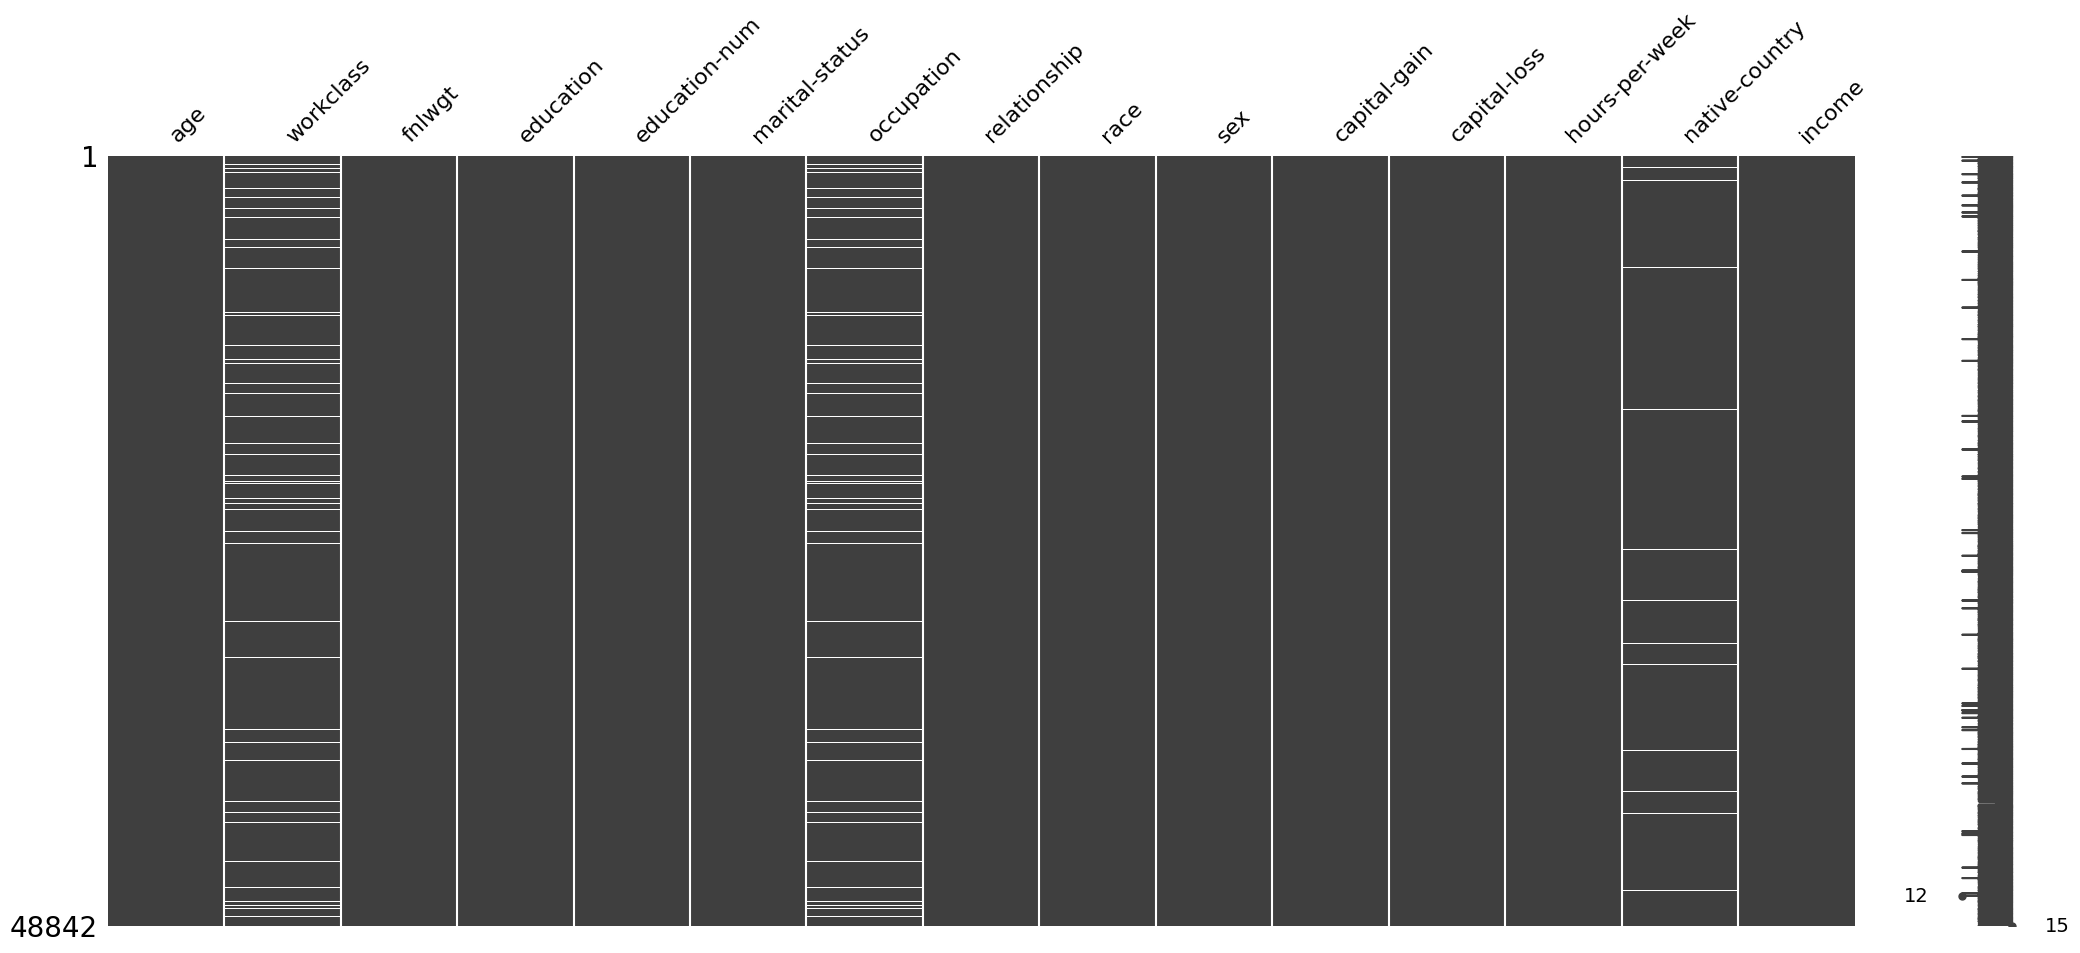

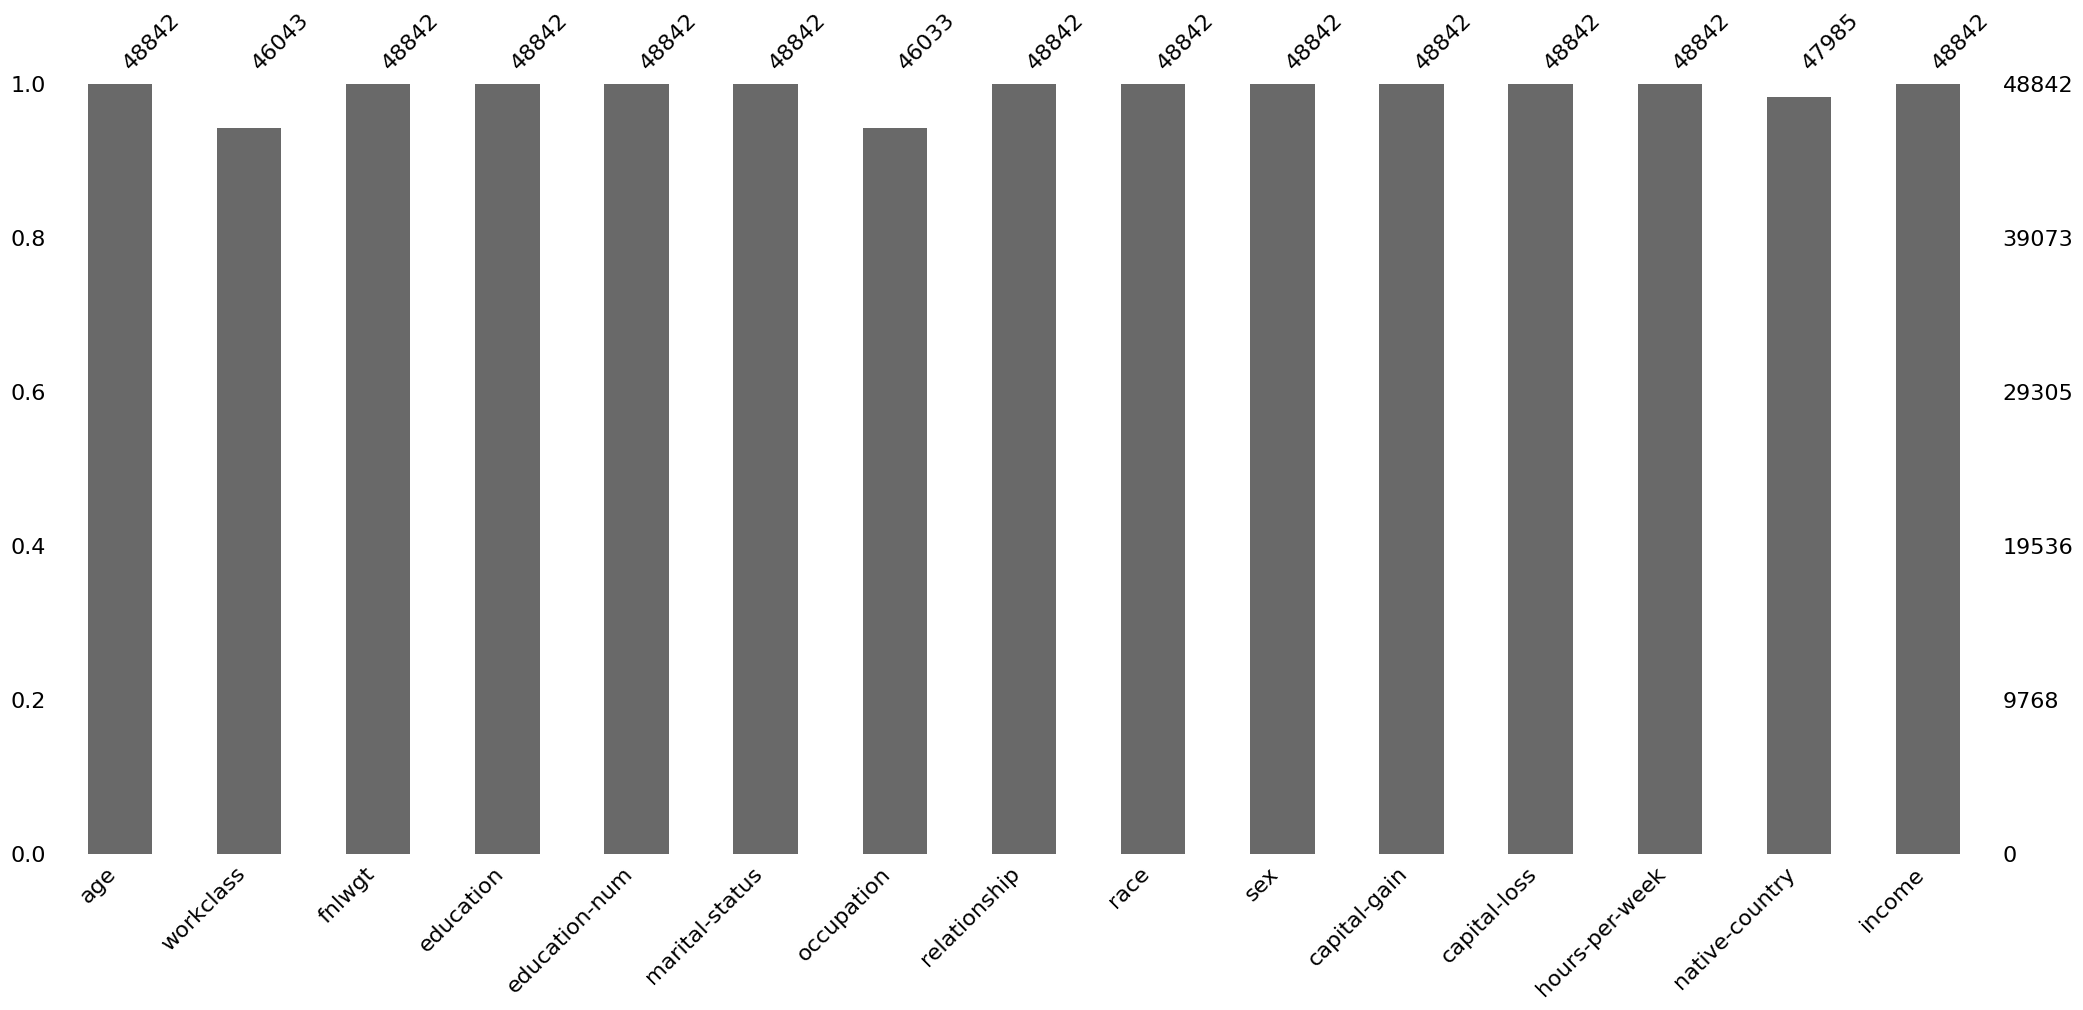

In [ ]:
# رسم مصفوفة القيم المفقودة
msno.matrix(data)
plt.show()

# رسم شريط القيم المفقودة
msno.bar(data)
plt.show()

In [ ]:
data = data.dropna(subset=['native-country'])

In [ ]:
data['workclass'].fillna('Unknown', inplace=True)
data['occupation'].fillna('Unknown', inplace=True)

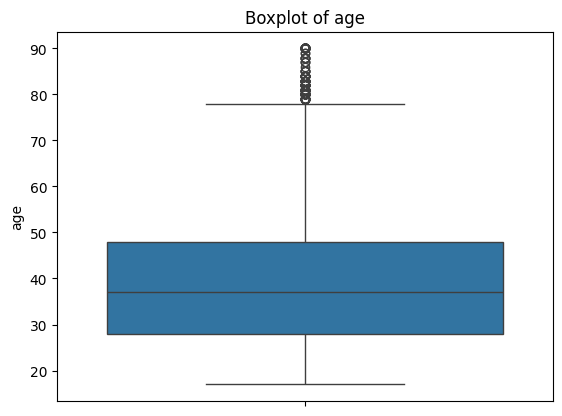

In [ ]:
  feature = 'age'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl">نلاحظ أن الأعمار التي تم تحديدها كقيم شاذة (مثل  80، 81، 83، و 90) هي أعمار طبيعية يمكن أن توجد في أي مجموعة سكانية. وبالتالي، لا تعتبر غير منطقية أو غير قابلة للتصديق.</p>




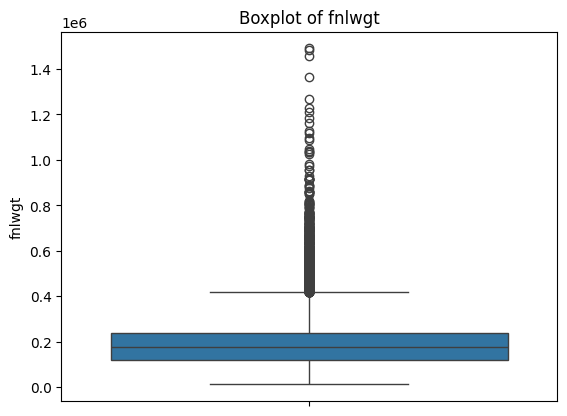

In [ ]:
  feature = 'fnlwgt'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl">بدلاً من حذف القيم الشاذة (القيم التي أكبر من Upper bound)، قمنا باستبدالها بالقيمة العليا المحددة. لتجنب فقدان أي صفوف في البيانات.</p>




In [ ]:
Q1_fnlwgt = data['fnlwgt'].quantile(0.25)
Q3_fnlwgt = data['fnlwgt'].quantile(0.75)
IQR_fnlwgt = Q3_fnlwgt - Q1_fnlwgt

upper_bound_fnlwgt = Q3_fnlwgt + 1.5 * IQR_fnlwgt

data['fnlwgt'] = data['fnlwgt'].apply(lambda x: upper_bound_fnlwgt if x > upper_bound_fnlwgt else x)

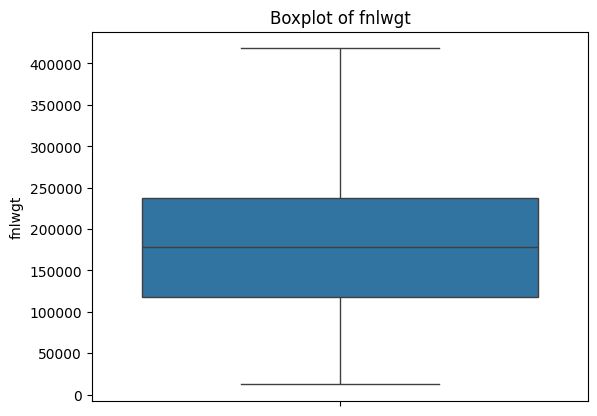

In [ ]:
  feature = 'fnlwgt'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

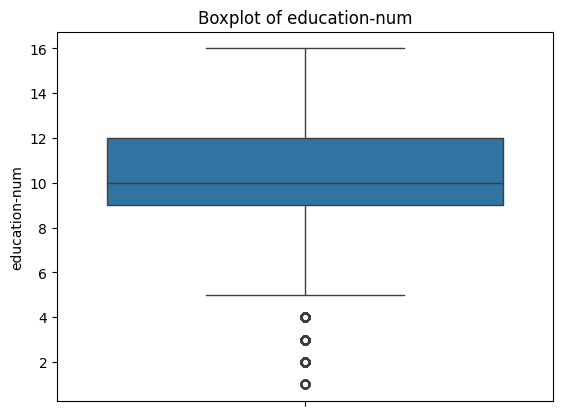

In [ ]:
  feature = 'education-num'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl">نلاحظ أن سنوات التعليم التي تم تحديدها كقيم شاذة (مثل  4، 3، 2 و 1) هي  طبيعية يمكن أن توجد في أي مجموعة سكانية. وبالتالي، لا تعتبر غير منطقية أو غير قابلة للتصديق.<br>
ونلاحظ ذلك من مهنة الشخص التي قضى سنوات تعليم أقل من 5 سنوات حيث أن مهنته هي مهنة لا تتطلب التعليم.<br>
مع بعض الحالات الاستثنائية التي من الممكن أن شخص  تعلم أقل من 5 سنوات لكنه استلم مناصب إدارية او تنفيذية

---


</p>




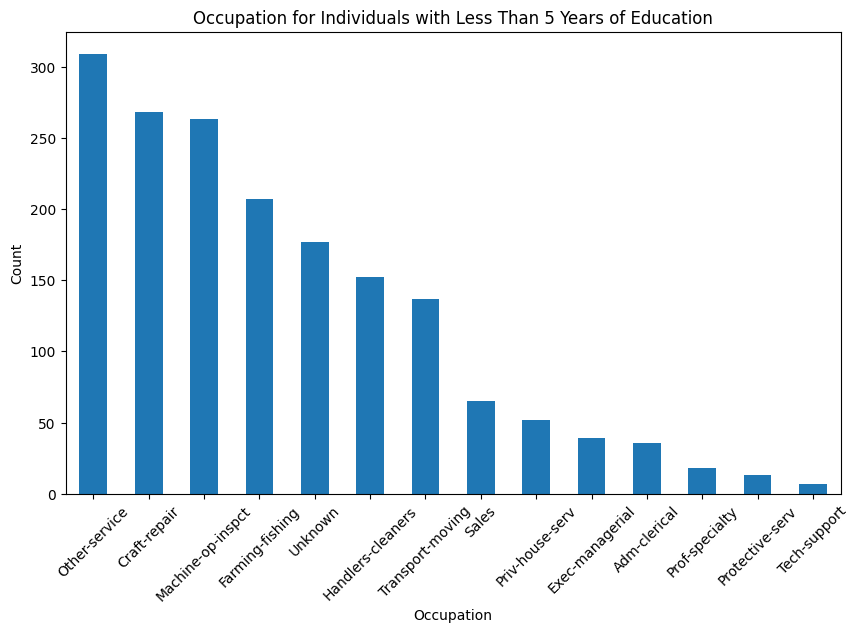

In [ ]:

low_education_data = data[data['education-num'] < 5]

occupation_counts = low_education_data['occupation'].value_counts()

plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.title('Occupation for Individuals with Less Than 5 Years of Education')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data['income'].unique()


array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
data = data.replace({'<=50K.': '<=50K', '>50K.': '>50K'})

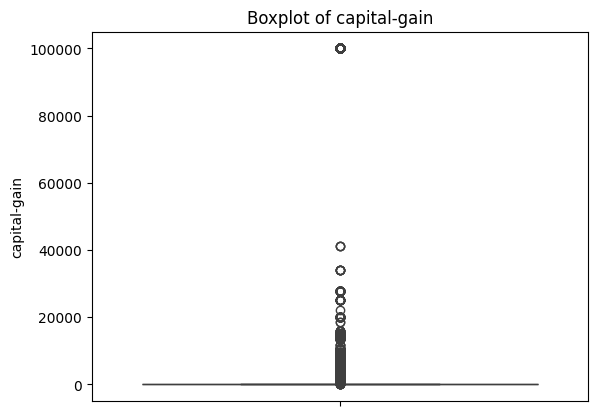

In [ ]:
  feature = 'capital-gain'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl"> نلاحظ أن القيم الكبيرة الشاذة مثل 99999 هي قليلة ونادرة، لكن وجودها قد يكون مبررًا في سياق الأرباح الاستثمارية الكبيرة. بدلاً من اعتبارها شاذة

---
</p>




In [ ]:

print(f"Number of observations having capital gain of 99999:{data.loc[data['capital-gain'] == 99999,:].shape}")
print(f"Income counts: {data.loc[data['capital-gain'] == 99999,:]['income'].value_counts()}")

Number of observations having capital gain of 99999:(234, 15)
Income counts: income
>50K    234
Name: count, dtype: int64


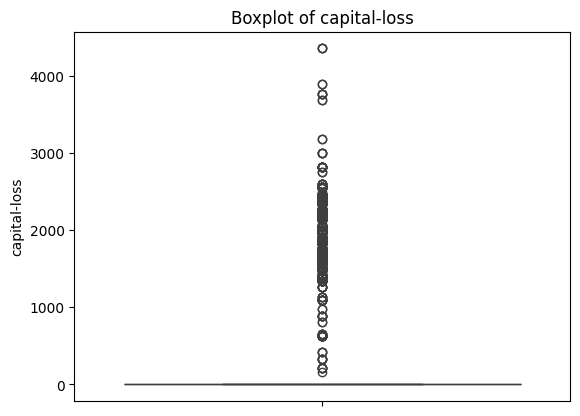

In [ ]:
  feature = 'capital-loss'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl"> نلاحظ أن القيم الشاذة مثل 5000 هي قليلة ونادرة، لكن وجودها قد يكون مبررًا في سياق الخسائر الاستثمارية. بدلاً من اعتبارها شاذة

---


</p>




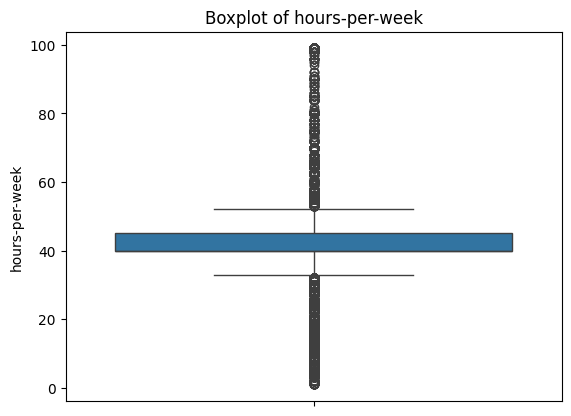

In [ ]:
  feature = 'hours-per-week'
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

<p dir="rtl"> منطقية القيم الشاذة<br>
القيم العالية: من المنطقي أن يكون هناك بعض الأفراد الذين يعملون ساعات طويلة جدًا (حتى 99 ساعة في الأسبوع) في بعض الوظائف أو الفترات الزمنية.<br>
القيم المنخفضة: أيضًا من المنطقي أن يكون هناك بعض الأفراد الذين يعملون بشكل جزئي أو في وظائف غير تقليدية، مما يؤدي إلى ساعات عمل منخفضة .<br>
لكن في حالة أن ساعات العمل أقل من 20 ساعة غير مقبولة أو أن تكون أكبر  من 60 الا في حالات اسثنائية

---
</p>






In [ ]:
lower_bound_hours = 20
upper_bound_hours = 60

data['hours-per-week'] = data['hours-per-week'].apply(lambda x: upper_bound_hours if x > upper_bound_hours else (lower_bound_hours if x < lower_bound_hours else x))

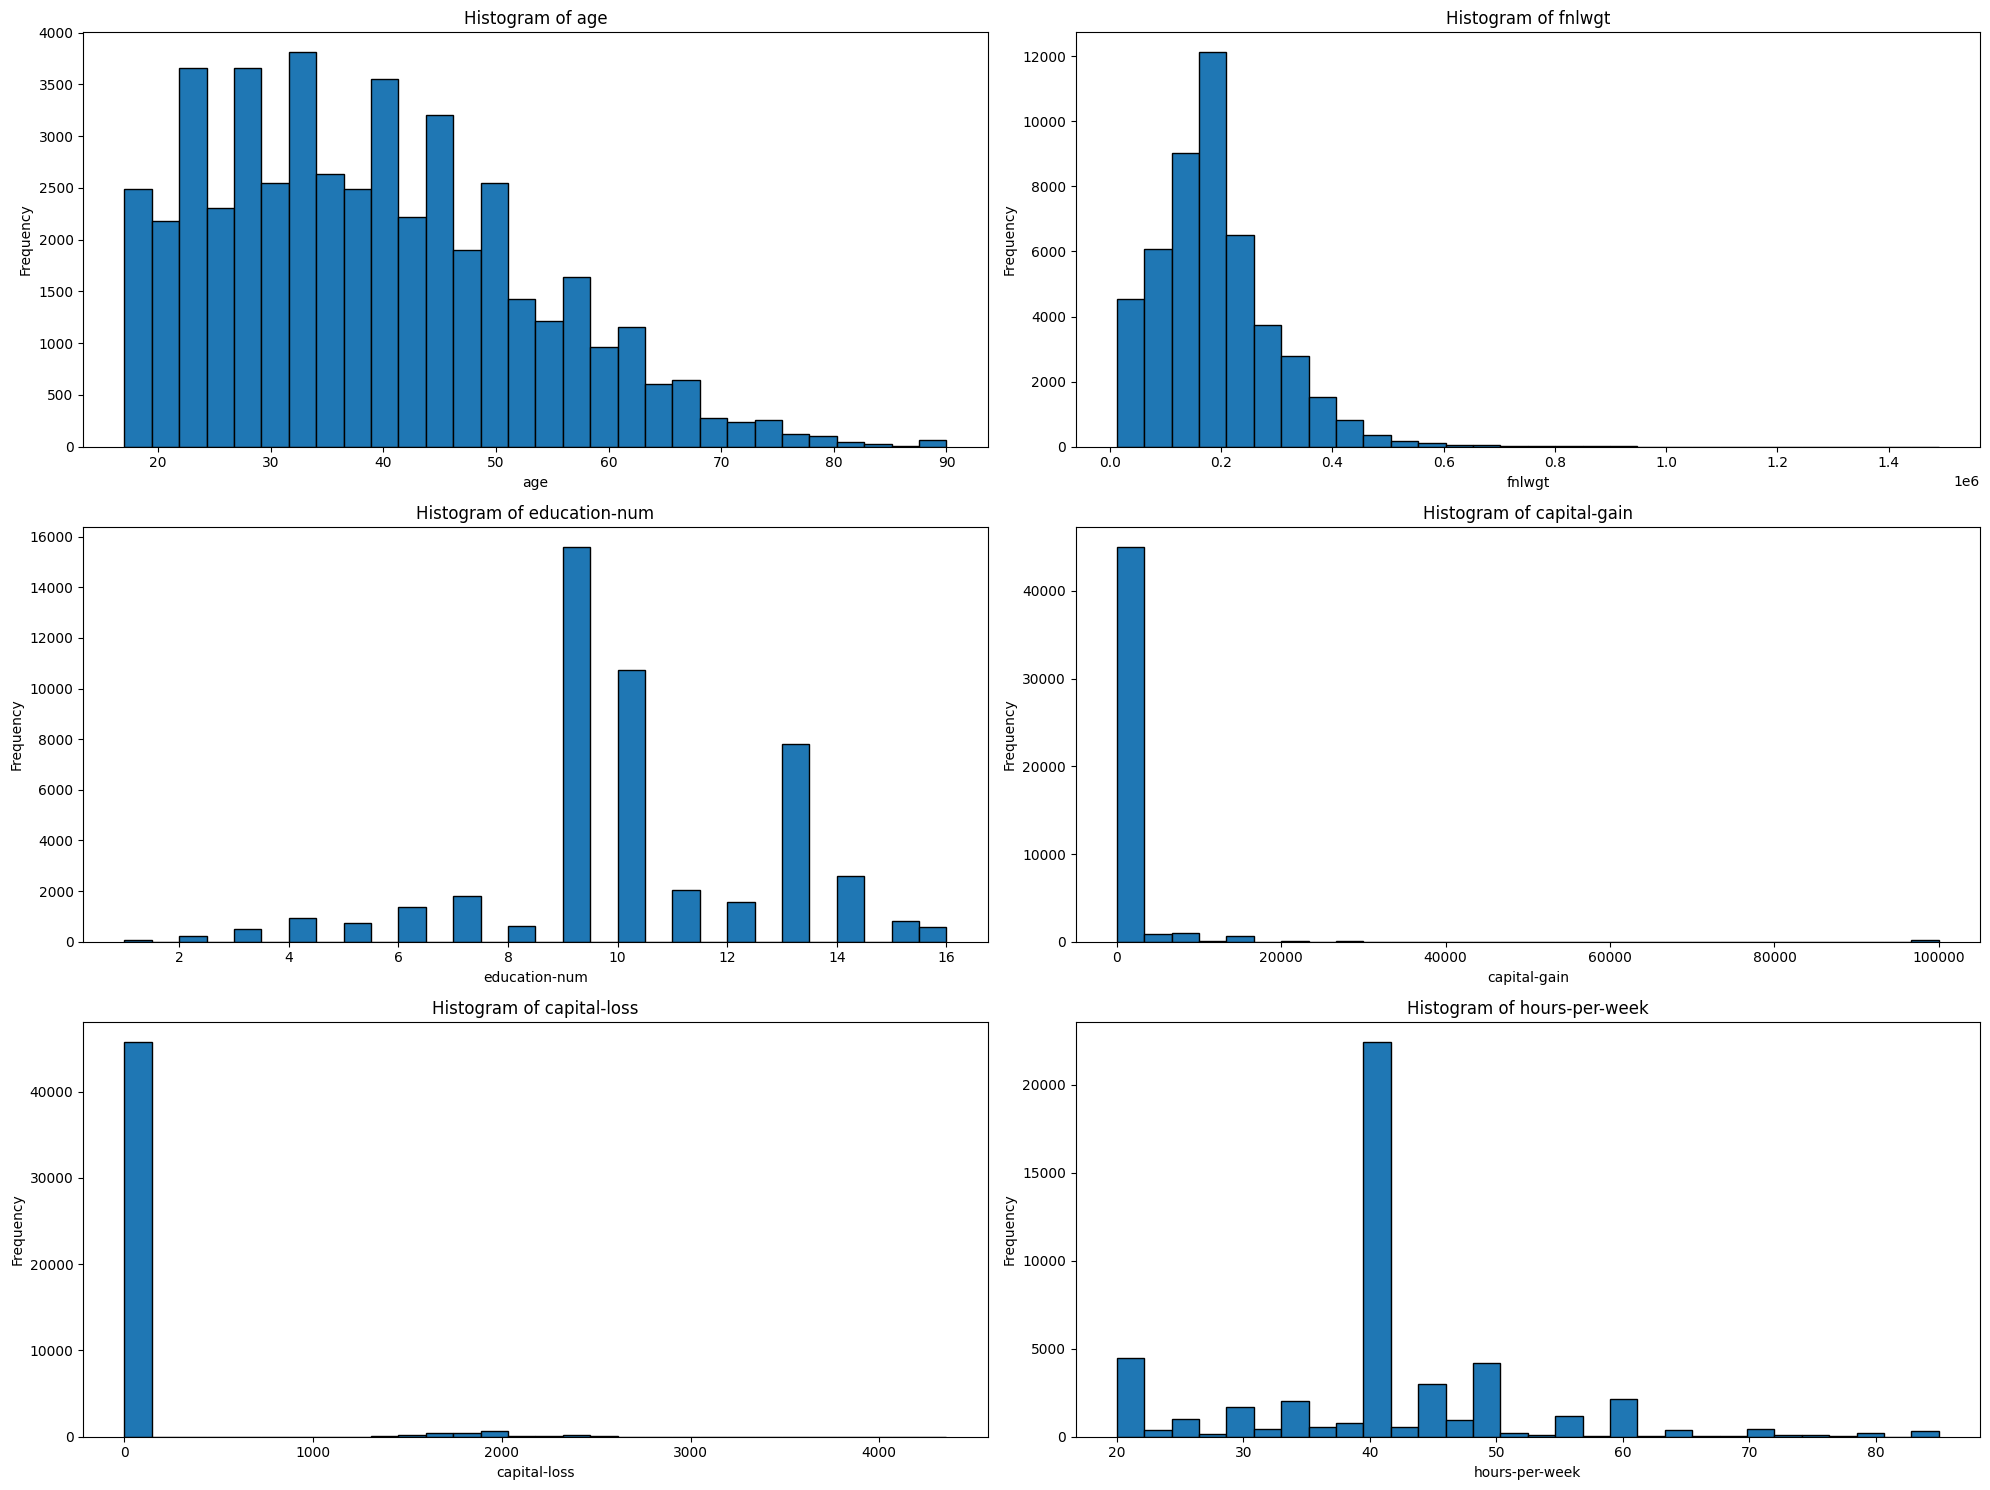

In [ ]:
columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    plt.hist(data[column], bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

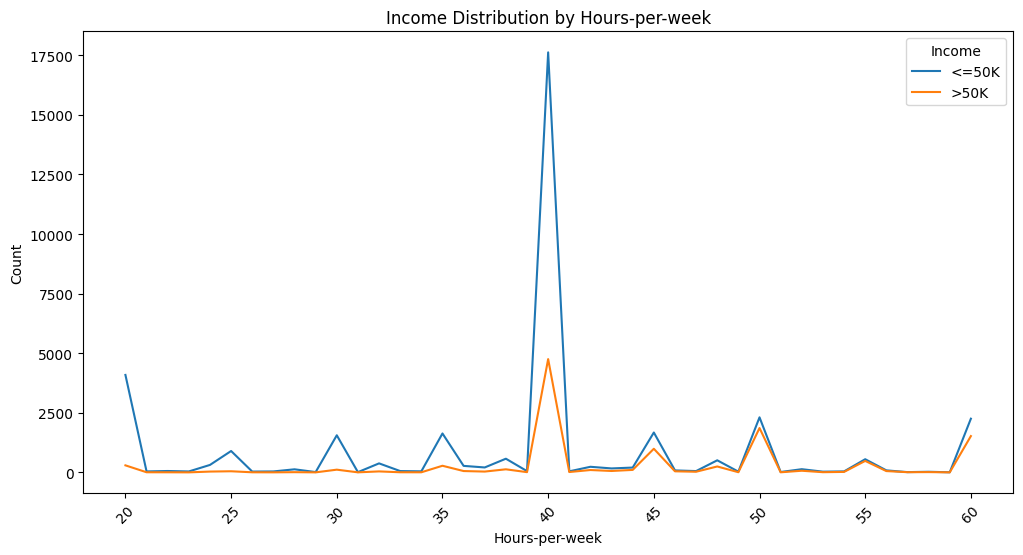

In [ ]:
# حساب توزيع الدخل حسب ساعات العمل الأسبوعية
income_hours_distribution = data.groupby(['hours-per-week', 'income']).size().unstack()

# رسم مخطط توزيع الدخل حسب ساعات العمل الأسبوعية
income_hours_distribution.plot(kind='line', figsize=(12, 6))
plt.title('Income Distribution by Hours-per-week')
plt.xlabel('Hours-per-week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

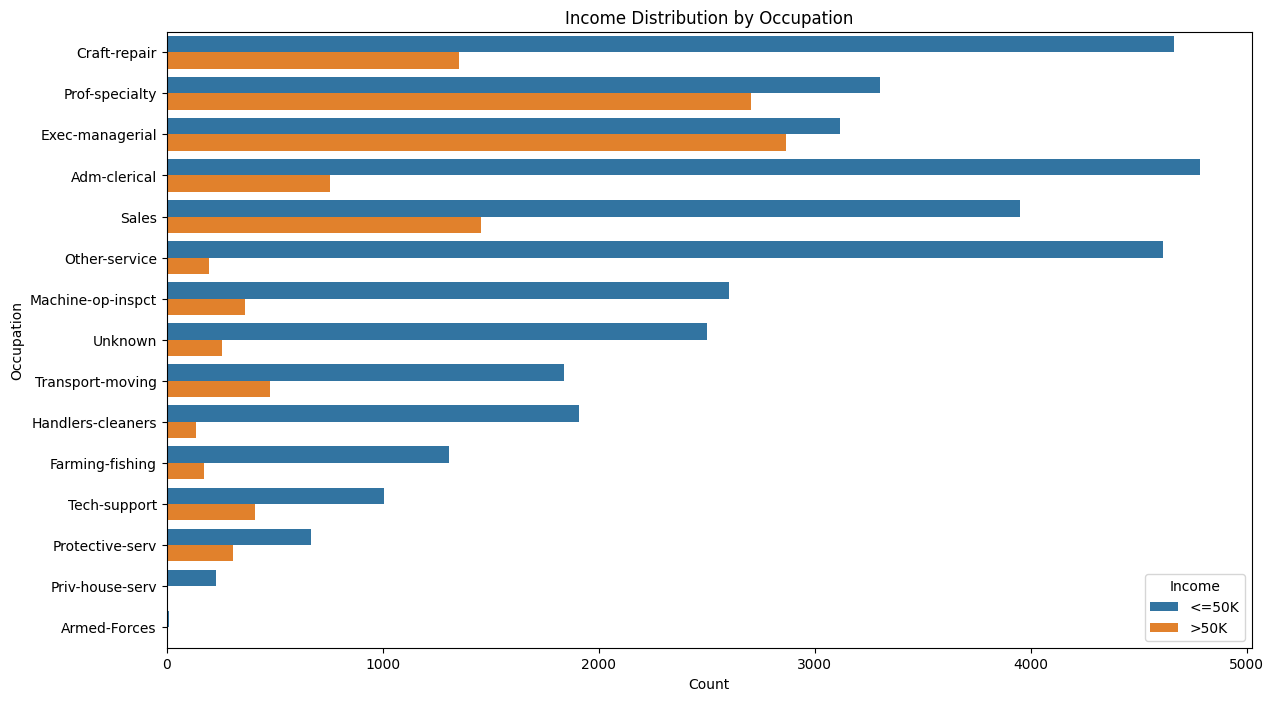

In [ ]:
# Plotting Income Distribution by Occupation
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='occupation', hue='income', order=data['occupation'].value_counts().index)
plt.title('Income Distribution by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Income')
plt.show()

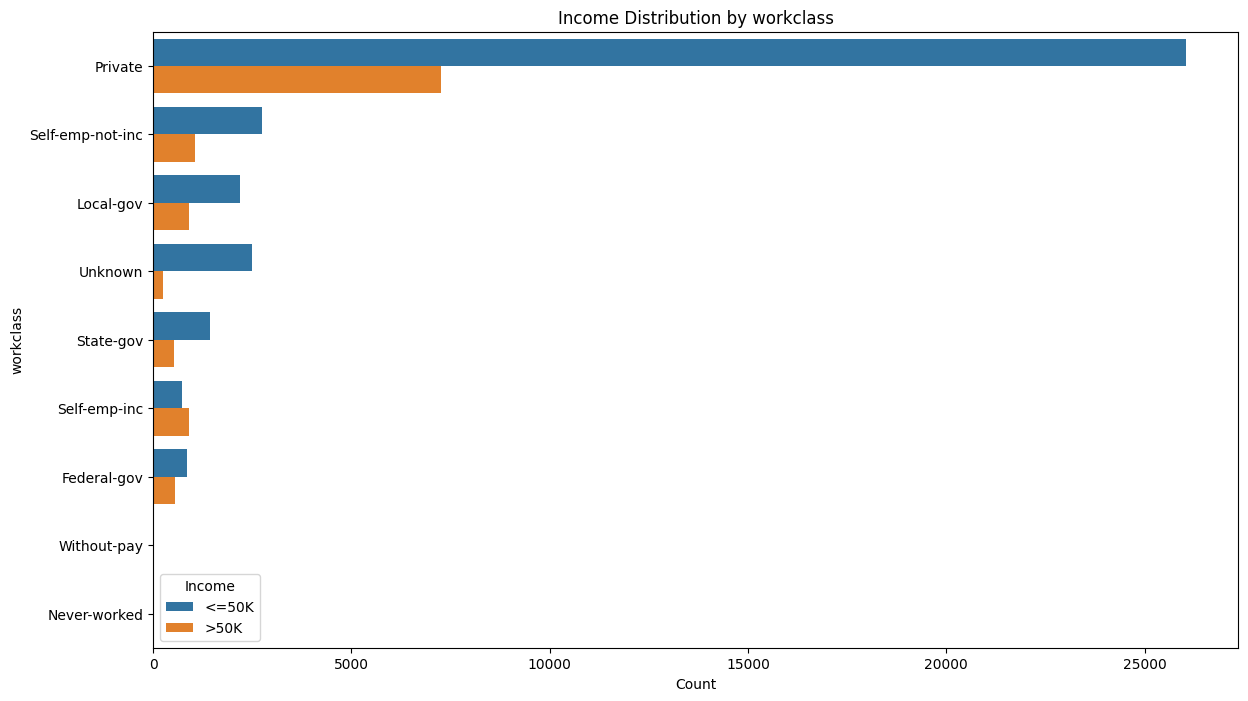

In [ ]:
# Plotting Income Distribution by workclass
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='workclass', hue='income', order=data['workclass'].value_counts().index)
plt.title('Income Distribution by workclass')
plt.xlabel('Count')
plt.ylabel('workclass')
plt.legend(title='Income')
plt.show()

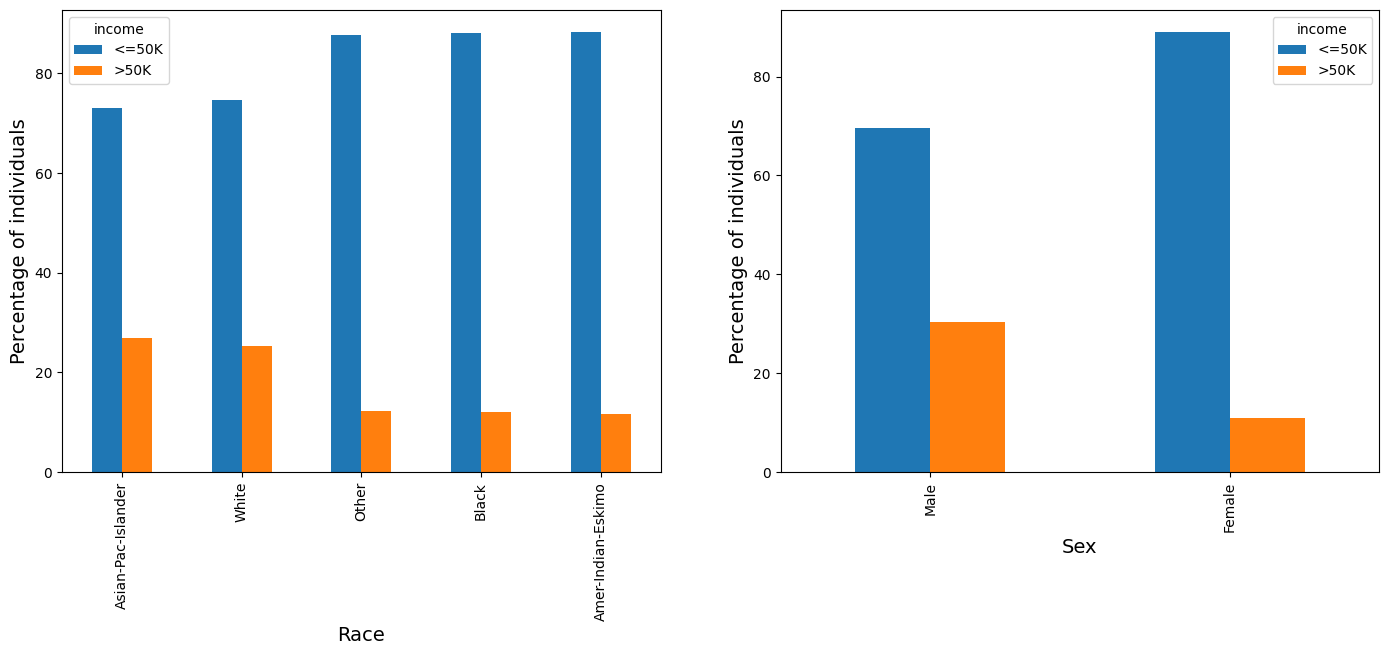

In [ ]:
table_race = pd.crosstab(data['race'], data['income'])
table_sex = pd.crosstab(data['sex'], data['income'])
table_country = pd.crosstab(data['native-country'], data['income'])
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Percentage of individuals',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Percentage of individuals',fontsize = 14);

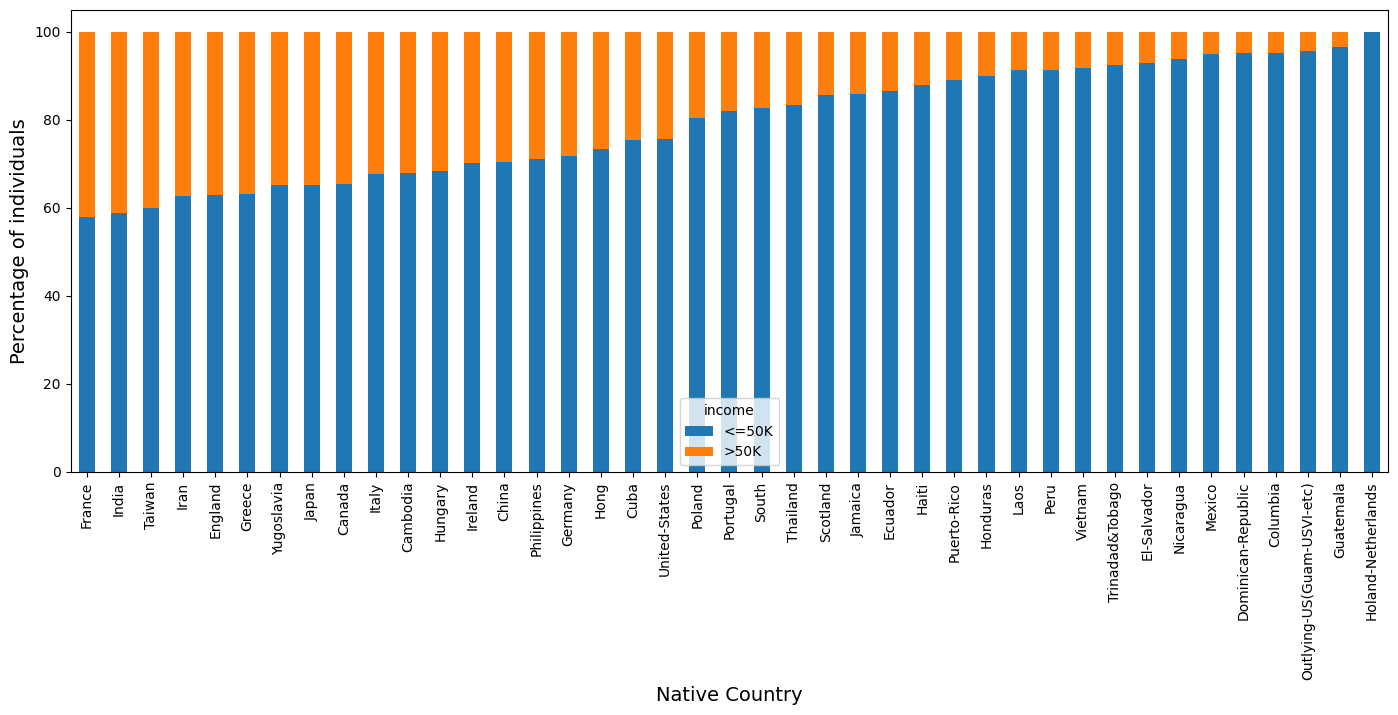

In [ ]:
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Percentage of individuals',fontsize = 14);

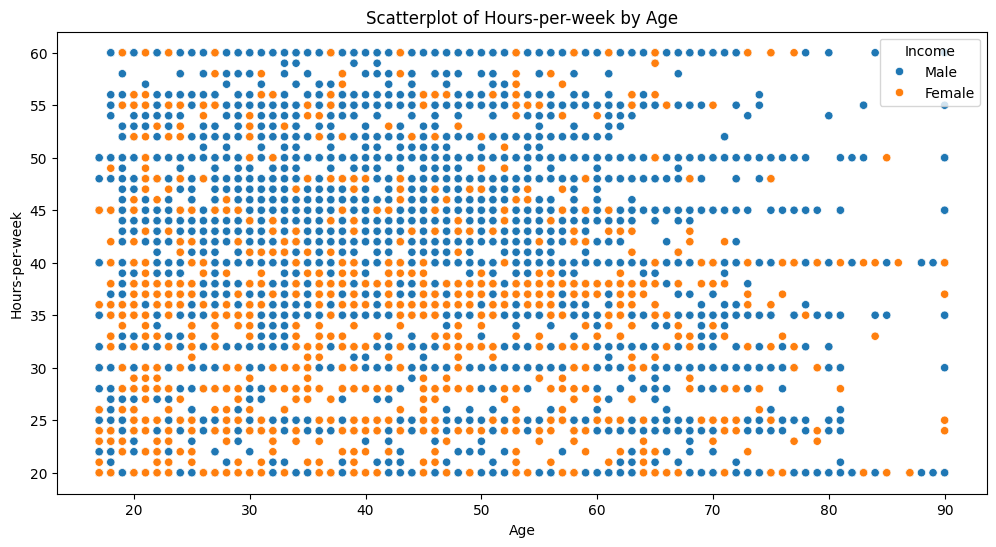

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='age', y='hours-per-week', hue='sex')
plt.title('Scatterplot of Hours-per-week by Age')
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.legend(title='Income')
plt.show()

In [ ]:
import plotly.express as px
fig = px.sunburst(data, path=['sex', 'occupation', 'income'], values='fnlwgt',
                  title='Sunburst Chart of Income Distribution by Occupation and Sex')
fig.show()

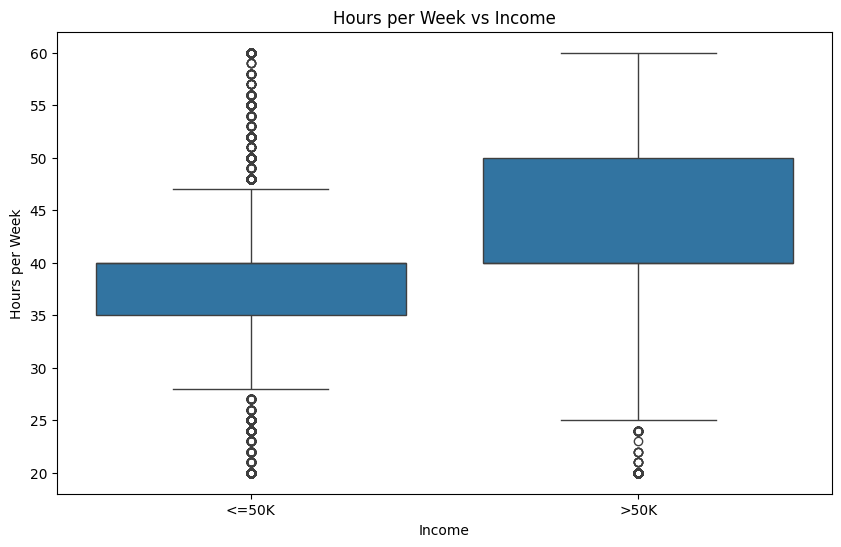

In [ ]:
#عدد ساعات العمل في الأسبوع مقابل الدخل
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Hours per Week vs Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()


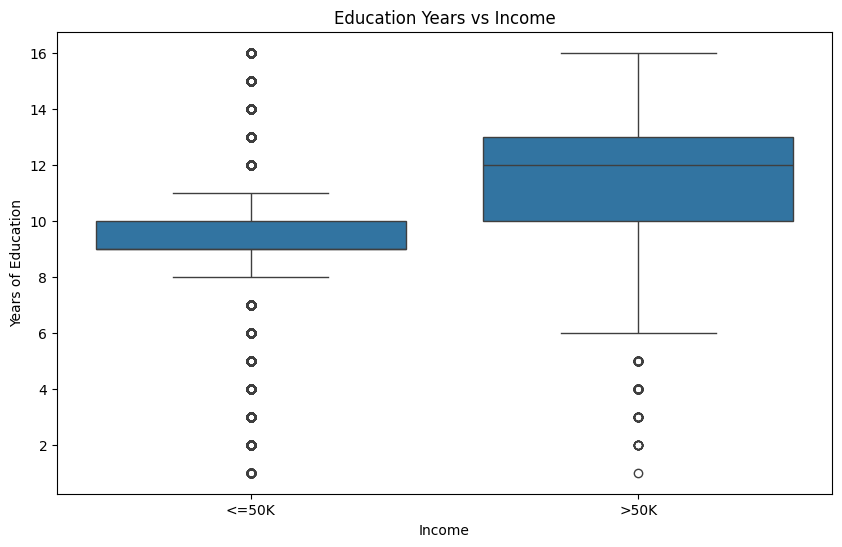

In [ ]:
#عدد سنوات التعليم مقابل الدخل
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='education-num', data=data)
plt.title('Education Years vs Income')
plt.xlabel('Income')
plt.ylabel('Years of Education')
plt.show()


In [ ]:
data2 = data.copy()
data3 = data.copy()

In [ ]:
# Feature Engineering: Add additional features
# إضافة فئات العمر
bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Senior', 'Elderly']
data3['age_category'] = pd.cut(data3['age'], bins=bins, labels=labels, right=False)

In [ ]:
import plotly.express as px
fig = px.sunburst(data3, path=['age_category', 'occupation', 'income'], values='fnlwgt',
                  title='Sunburst Chart of Income Distribution by Occupation and Sex')
fig.show()

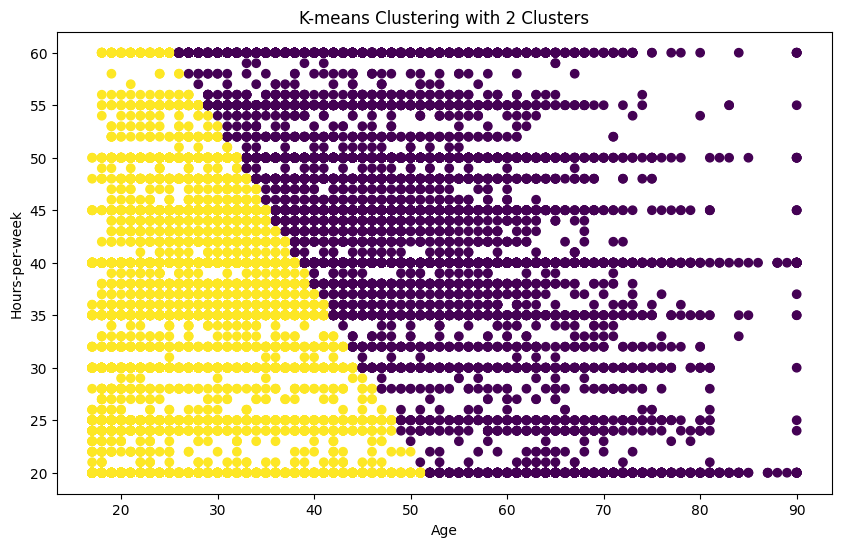

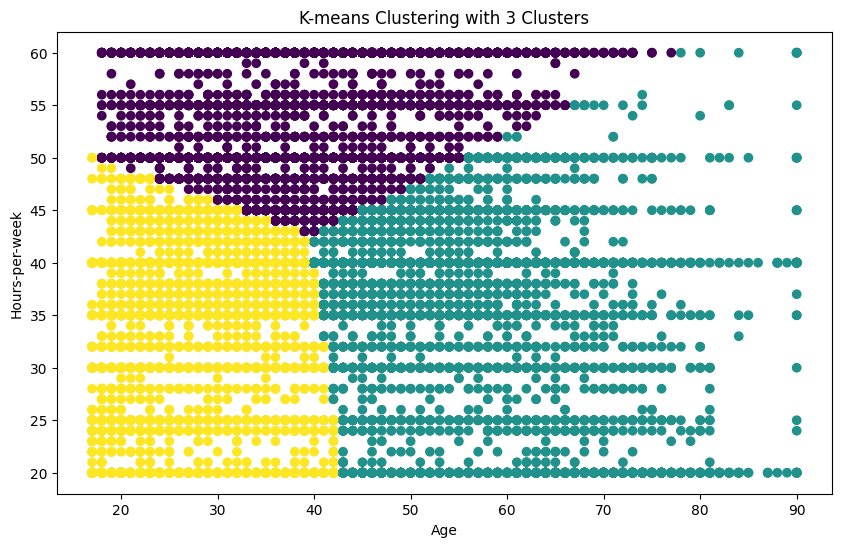

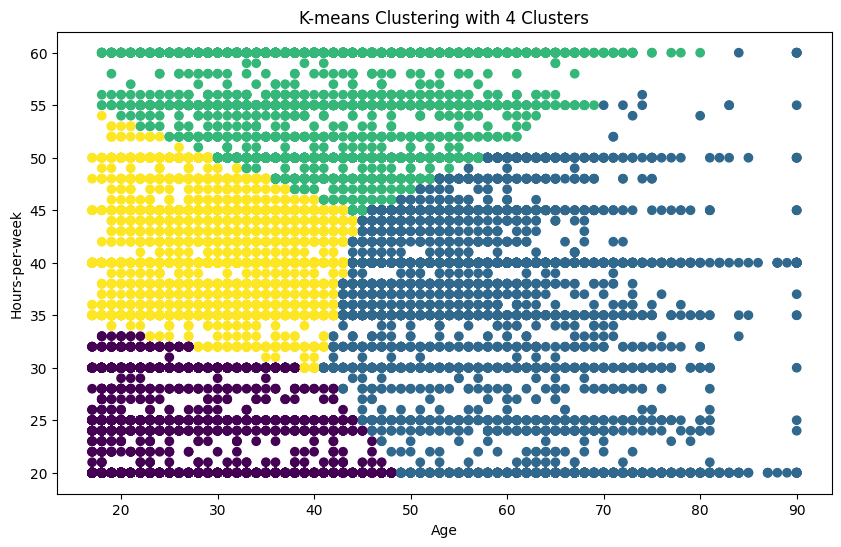

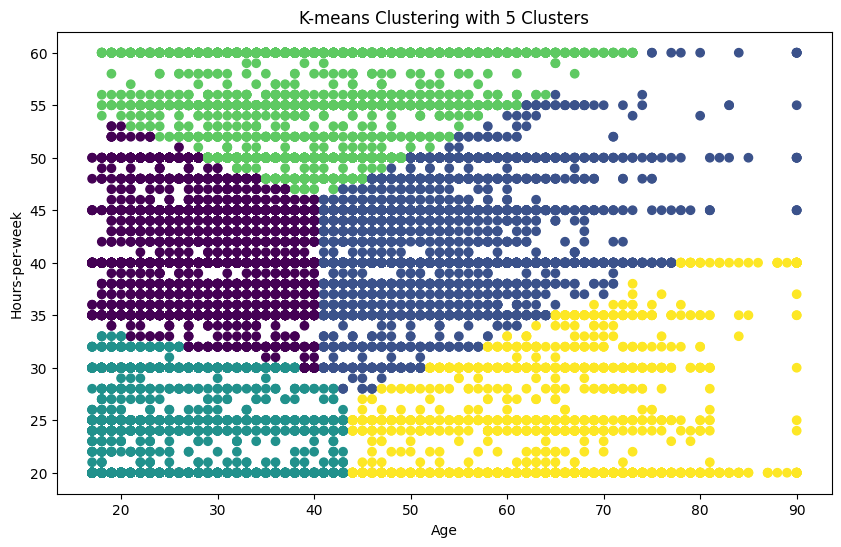

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = data2[['age', 'hours-per-week']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    data2[f'kmeans_cluster_{n_clusters}'] = kmeans.fit_predict(scaled_features)

    # رسم النتائج
    plt.figure(figsize=(10, 6))
    plt.scatter(data2['age'], data2['hours-per-week'], c=data2[f'kmeans_cluster_{n_clusters}'], cmap='viridis')
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.xlabel('Age')
    plt.ylabel('Hours-per-week')
    plt.show()


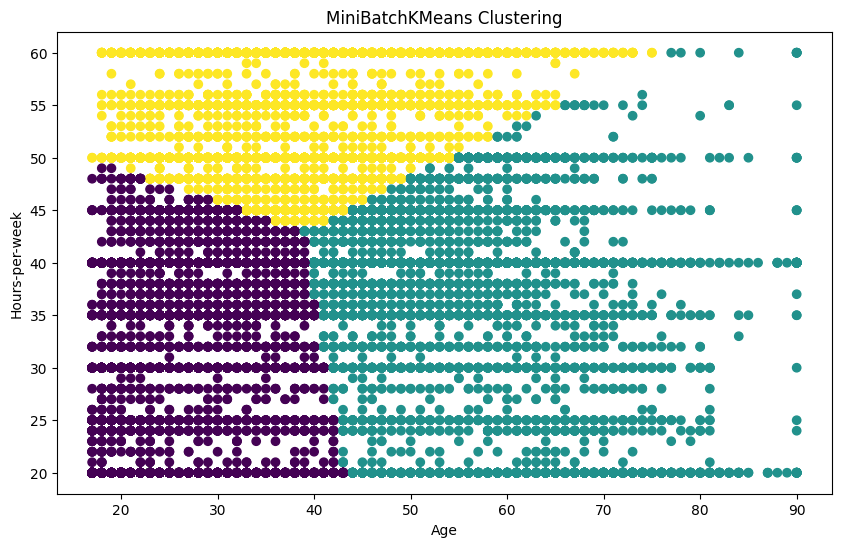

In [ ]:
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans = MiniBatchKMeans(n_clusters=3, n_init=10, random_state=42, batch_size=100)
data['mini_batch_kmeans_cluster'] = mini_batch_kmeans.fit_predict(scaled_features)

# رسم النتائج
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['hours-per-week'], c=data['mini_batch_kmeans_cluster'], cmap='viridis')
plt.title('MiniBatchKMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.show()

In [ ]:
data2 = data.copy()

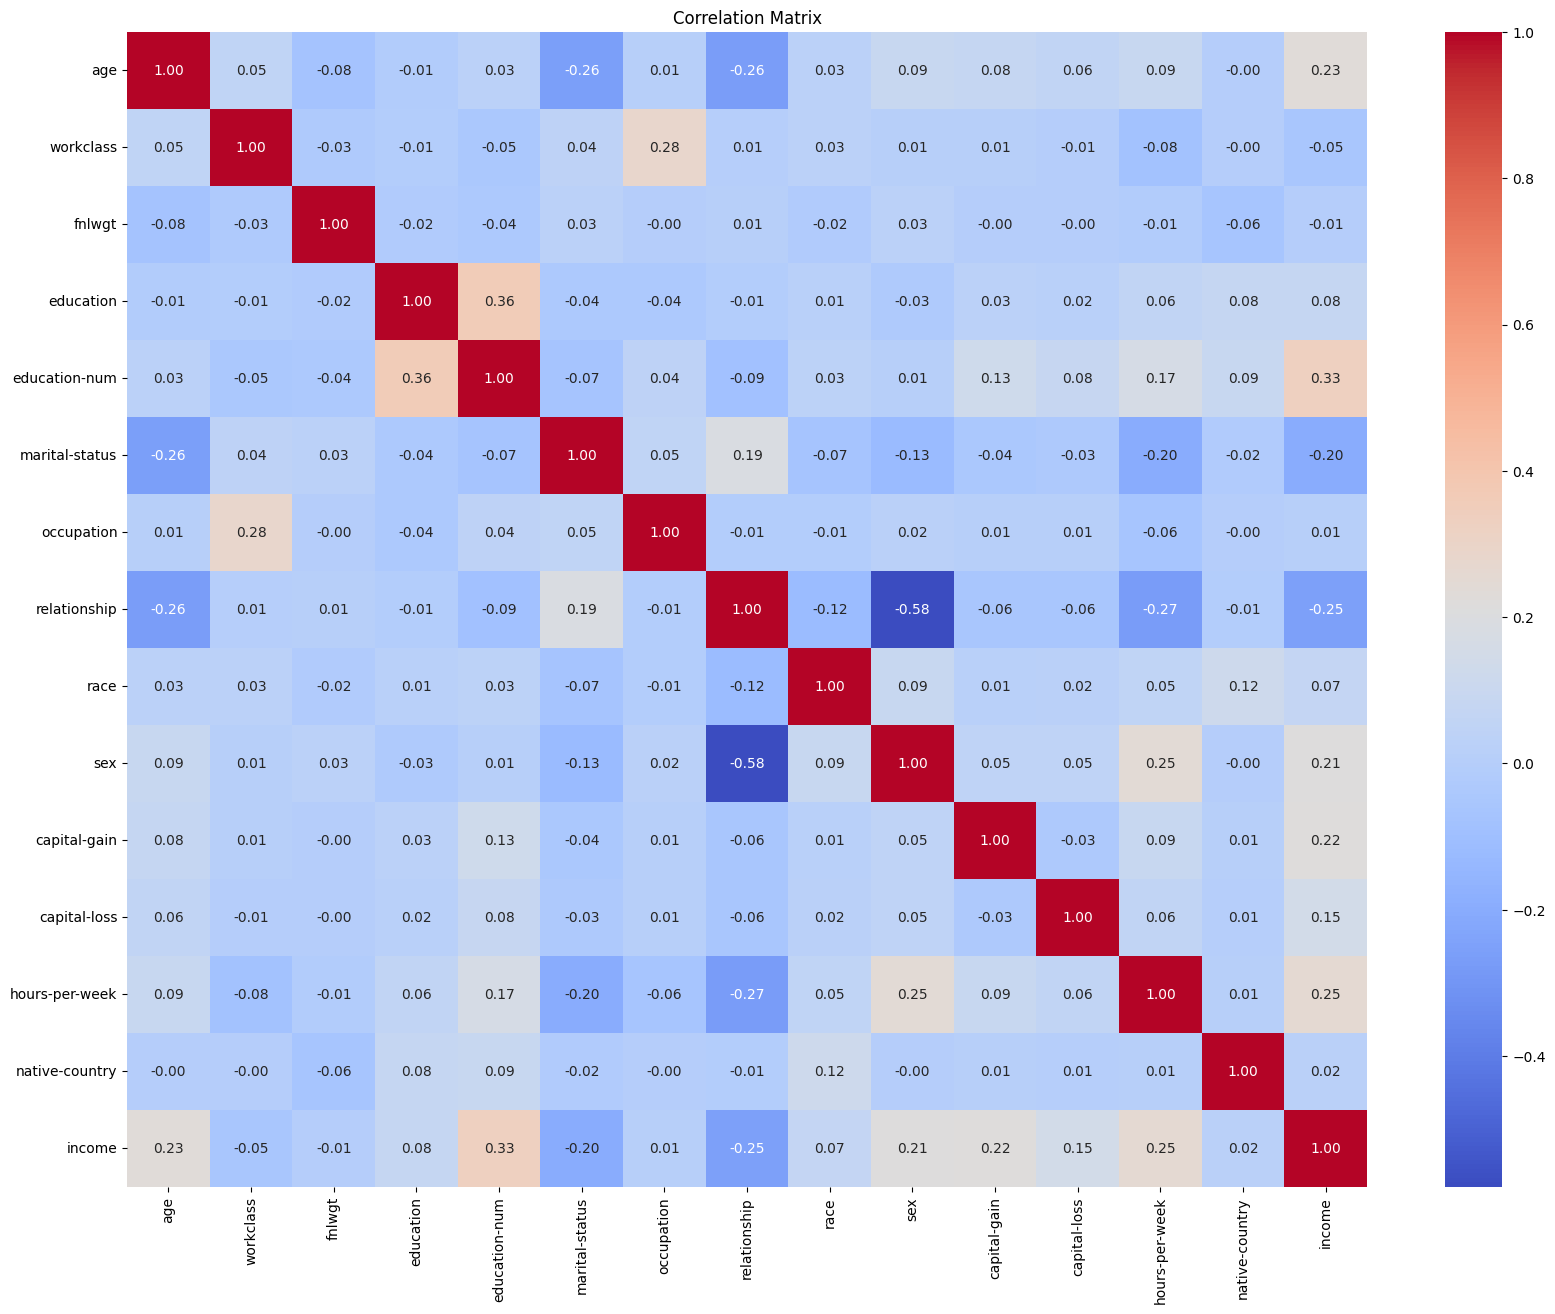

In [ ]:

from sklearn.preprocessing import LabelEncoder


# List of columns to encode
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the categorical columns
for col in categorical_cols:
    data2[col] = label_encoder.fit_transform(data2[col])

# Calculate the correlation matrix
corr_matrix = data2.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# فحص توزيع البيانات في عمود الدخل
income_distribution = data['income'].value_counts()

# طباعة التوزيع
print("Number of non-fraudulent transactions (<=50K):", income_distribution.get('<=50K', 0))
print("Number of fraudulent transactions (>50K):", income_distribution.get('>50K', 0))

Number of non-fraudulent transactions (<=50K): 36518
Number of fraudulent transactions (>50K): 11467


Call this type of data is Imbalanced Data

In [ ]:
# Split the data into features and target
X = data2.drop('income', axis=1)
y = data2['income']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  35988
Number transactions test dataset:  11997
Total number of transactions:  47985


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import xgboost as xgb


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1],
            'solver': ['liblinear']
        }
    },
    # 'KNN': {
    #     'model': KNeighborsClassifier(),
    #     'params': {
    #         'n_neighbors': [3, 5],
    #         'weights': ['uniform'],
    #         'metric': ['euclidean']
    #     }
    # },
    # 'SVM': {
    #     'model': SVC(),
    #     'params': {
    #         'C': [1, 10],
    #         'kernel': ['linear'],
    #         'gamma': ['scale']
    #     }
    # },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini'],
            'max_depth': [None, 5]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50],
            'criterion': ['gini'],
            'max_depth': [None, 5]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.1, 1]
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(),
        'params': {
            'n_estimators': [300],
            'learning_rate': [0.05],
            'max_depth': [8],
            'subsample': [0.7],
            'colsample_bytree': [0.7]
        }
        },
}



# model_params = {
#     'Logistic Regression': {
#         'model': LogisticRegression(),
#         'params': {
#             'C': [0.01, 0.1, 1, 10, 100],
#             'solver': ['liblinear']
#         }
#     },
#     'KNN': {
#         'model': KNeighborsClassifier(),
#         'params': {
#             'n_neighbors': [3, 5, 7, 9],
#             'weights': ['uniform', 'distance'],
#             'metric': ['euclidean', 'manhattan']
#         }
#     },
#     'SVM': {
#         'model': SVC(),
#         'params': {
#             'C': [0.1, 1, 10, 100],
#             'kernel': ['rbf', 'linear', 'poly'],
#             'gamma': ['scale', 'auto']
#         }
#     },
#     'Naive Bayes': {
#         'model': GaussianNB(),
#         'params': {}
#     },
#     'Decision Tree': {
#         'model': DecisionTreeClassifier(),
#         'params': {
#             'criterion': ['gini', 'entropy'],
#             'max_depth': [None, 5, 10, 15]
#         }
#     },
#     'Random Forest': {
#         'model': RandomForestClassifier(),
#         'params': {
#             'n_estimators': [10, 50, 100],
#             'criterion': ['gini', 'entropy'],
#             'max_depth': [None, 5, 10, 15]
#         }
#     },
#     'AdaBoost': {
#         'model': AdaBoostClassifier(),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 1, 10]
#         }
#     }
# }

In [ ]:
results = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    report = classification_report(y_test, y_pred, output_dict=True)
    support = sum([report[str(label)]['support'] for label in np.unique(y_test)])

    results.append({
        'Model': model_name,
        'Best Parameters': clf.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Support': support
    })
    #print(results)

results_df = pd.DataFrame(results)

In [ ]:
# إضافة عمود label بناءً على Accuracy
def label_performance(row):
    if row['Accuracy'] >= 0.90:
        return 'Very good'
    elif row['Accuracy'] >= 0.80:
        return 'Good'
    elif row['Accuracy'] >= 0.70:
        return 'Acceptable'
    else:
        return 'Unacceptable'

results_df['Label'] = results_df.apply(label_performance, axis=1)
results_df

,Model,Best Parameters,Accuracy,Precision,Recall,F1 Score,Support,Label
0,Logistic Regression,"{'C': 0.1, 'solver': 'liblinear'}",0.822456,0.811560,0.822456,0.806494,11997,Good
1,Naive Bayes,{},0.801450,0.785498,0.801450,0.777187,11997,Good
2,Decision Tree,"{'criterion': 'gini', 'max_depth': 5}",0.850129,0.843677,0.850129,0.840451,11997,Good
3,Random Forest,"{'criterion': 'gini', 'max_depth': None, 'n_es...",0.852213,0.846153,0.852213,0.847033,11997,Good
4,AdaBoost,"{'learning_rate': 1, 'n_estimators': 100}",0.862632,0.857247,0.862632,0.856617,11997,Good
5,XGBoost,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.870051,0.865483,0.870051,0.865674,11997,Good
